# Do changes bring difference: A comparative study of Manchester United’s performance after sacking Jose Mourinho

Angie Liang, Sam Zhang, Zizhen Guo

> Todos
> - [ ] One more reference from scientific paper

## Introduction
Jose Mourinho, the controversial “special one” was sacked by Manchester United by December 18, 2018 ([BBC](https://www.bbc.com/sport/football/46603018)). The Portuguese manager joined the England Premier League solikccer club in May 2016, and took the charge for more than 2 years. Jose is broadly recognized as one of the greatest all-time soccer managers ([ESPN, 2013](https://web.archive.org/web/20131023073918/http://espnfc.com/news/story/_/id/1514848/)).

<img src="intro.assets/jose.jpg" alt="jose" style="zoom:50%;" />

### Purpose
Our goal in this study is to quantitatively evaluate the effectiveness of Manchester United sacking Jose Mourinho. In other word, whether or not such a decision significantly improves the United’ performance in Premier League. The goal difference in each match will be investigated as a simplified process of the ELO system (Hvattum & Arntzen, 2009).

### Dataset
We procecced with the [Premier League results dataset](https://www.football-data.co.uk/englandm.php). After wrangling in the **Preliminary Results** section, our dataset `league_results` record Manchester United’ goal differences in 76 matches over season 2016/17 and 2017/18 coached by Jose Mourinho (`coach == 'old`), and 76 matches in season 19/20 and 20/21 coached by Ole Gunnar Solskjær (`coach == 'new'`), who replaced Jose’s position in December, 2018. 

### Sampling and hypothesis testing
We will construct a null model with bootstrap sampling method, and conduct hypothesis tests with significance level $\alpha=0.05$ on both the means as the location parameter and standard deviations as the scale parameter. 
#### Testing on means
The mean value represents the averaged-out difference in goals of one manager. We assume $\mu_m$ is the mean of goal difference for Manchester United under Jose Mourinho’s leadership, and $\mu_s$ represents the mean goal difference as Ole Gunnar Solskjær took his position.

- Null hypothesis $H_0:\mu_s=\mu_m$
- Alternative hypothesis $H_A:\mu_s>\mu_m$

#### Testing on standard deviations
The standard deviation evaluates the variation of goal difference, or the stability of the team. We want to compare the standard deviation of goal difference along matches between the original coach $\sigma_m$ and the new coach $\sigma_s$.
- Null hypothesis $H_0:\sigma_s=\sigma_m$
- Alternative hypothesis $H_A:\sigma_s<\sigma_m$

## Preliminary Results

In [1]:
# loading required packeges
library(tidyverse)
library(repr)
library(digest)
library(infer)
require(gridExtra)
library(cowplot)

# suppress warnings
options(warn=-1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘infer’ was built under R version 4.0.2”
Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 them

### Import raw data from [football-data.co.uk](https://www.football-data.co.uk/englandm.php) and wrangle the format

In [2]:
league_20_21 <- 
    read.csv('https://www.football-data.co.uk/mmz4281/2021/E0.csv') %>% 
    filter(HomeTeam == 'Man United' | AwayTeam == 'Man United') %>%
    mutate(goal_diff = (FTHG - FTAG) * (HomeTeam == 'Man United') +
              (FTAG - FTHG) * (AwayTeam == 'Man United')) %>% 
    select(goal_diff)

league_19_20 <- 
    read.csv('https://www.football-data.co.uk/mmz4281/1920/E0.csv') %>% 
    select(Date, HomeTeam, AwayTeam, FTHG, FTAG) %>%
    filter(HomeTeam == 'Man United' | AwayTeam == 'Man United') %>%
    mutate(goal_diff = (FTHG - FTAG) * (HomeTeam == 'Man United') +
              (FTAG - FTHG) * (AwayTeam == 'Man United')) %>%
    select(goal_diff)

league_17_18 <- 
    read.csv('https://www.football-data.co.uk/mmz4281/1718/E0.csv') %>% 
    select(Date, HomeTeam, AwayTeam, FTHG, FTAG) %>%
    filter(HomeTeam == 'Man United' | AwayTeam == 'Man United') %>%
    mutate(goal_diff = (FTHG - FTAG) * (HomeTeam == 'Man United') +
              (FTAG - FTHG) * (AwayTeam == 'Man United')) %>% 
    select(goal_diff)

league_16_17 <- 
    read.csv('https://www.football-data.co.uk/mmz4281/1617/E0.csv') %>% 
    select(Date, HomeTeam, AwayTeam, FTHG, FTAG) %>%
    filter(HomeTeam == 'Man United' | AwayTeam == 'Man United') %>%
    mutate(goal_diff = (FTHG - FTAG) * (HomeTeam == 'Man United') +
              (FTAG - FTHG) * (AwayTeam == 'Man United')) %>%
    select(goal_diff)

old_coach <- rbind(league_16_17, league_17_18) %>% mutate(coach = 'old') 
new_coach <- rbind(league_19_20, league_20_21) %>% mutate(coach = 'new')

league_results <- rbind(old_coach, new_coach)
head(league_results)

,goal_diff,coach
,<int>,<chr>
1,2,old
2,2,old
3,1,old
4,-1,old
5,-2,old
6,3,old


### Parameters and sample distribution

In [3]:
obs_stat <- league_results %>%
    group_by(coach) %>%
    summarize(mean = mean(goal_diff), 
             sd = sd(goal_diff))

obs_stat

obs_diff_mean <- obs_stat$mean[1] - obs_stat$mean[2]
obs_diff_mean

obs_sd_sd <- obs_diff_mean <- obs_stat$sd[1] - obs_stat$sd[2]
obs_sd_sd

`summarise()` ungrouping output (override with `.groups` argument)



coach,mean,sd
<chr>,<dbl>,<dbl>
new,0.7763158,1.915541
old,0.8552632,1.537998


[1] -0.07894737

[1] 0.377543

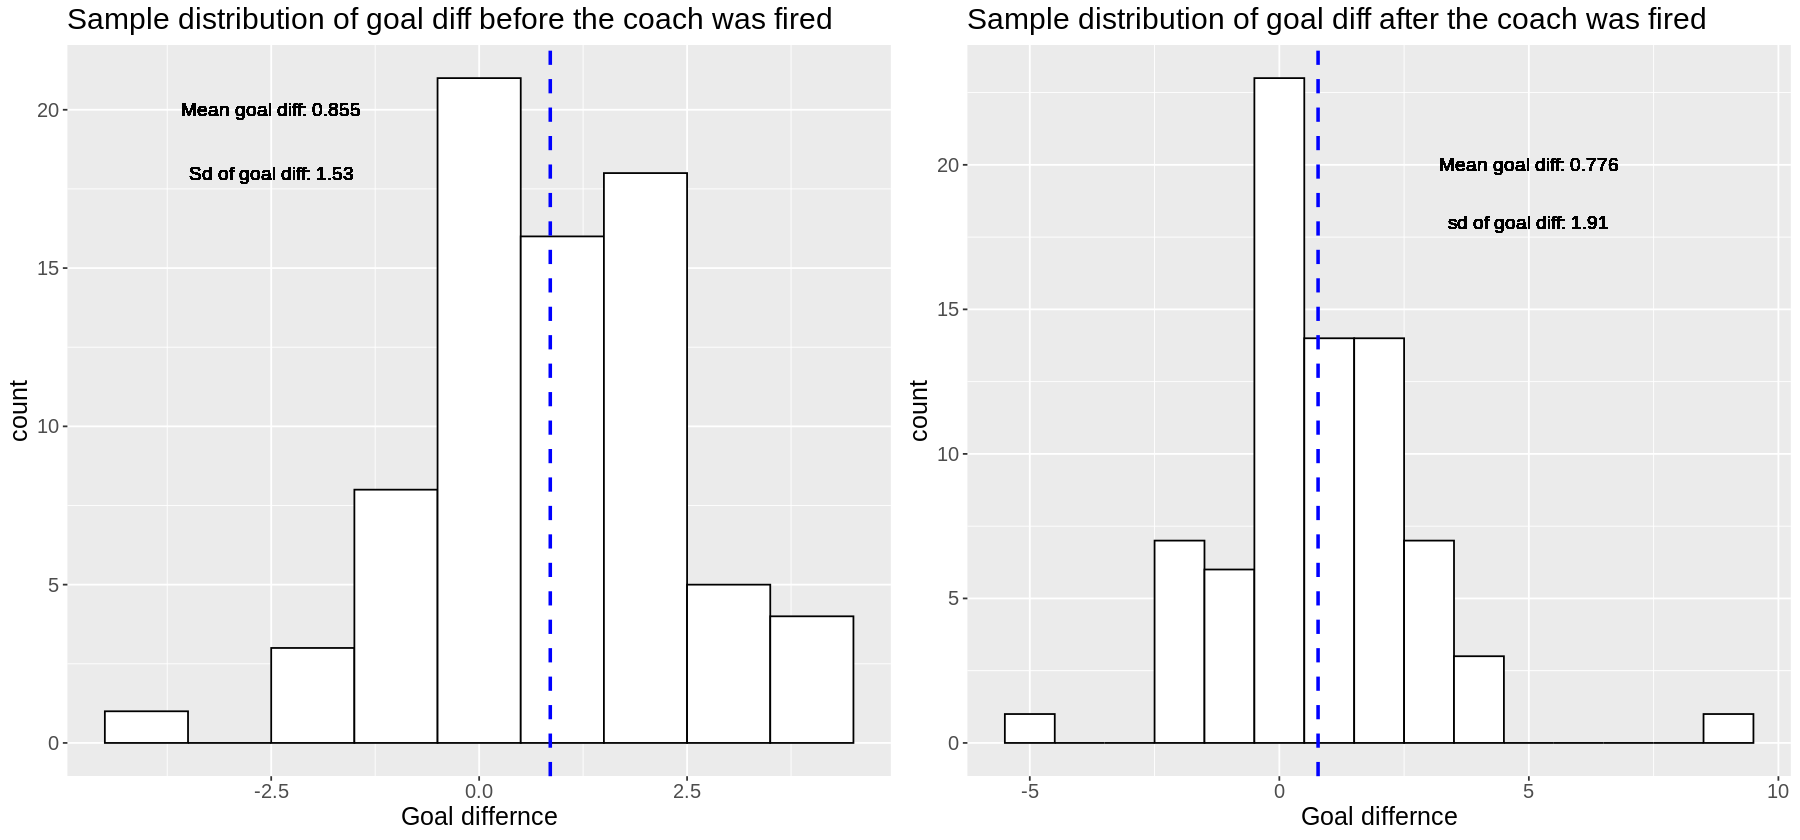

In [4]:
# <------- sample distribution with the old coach ----------------

goal_diff_before_fired_sample_distribution <- old_coach %>%   
ggplot() +
geom_histogram(aes(x = goal_diff), color = "black", fill = "white", binwidth = 1) +
geom_vline(aes(xintercept = mean(goal_diff)), color = "blue", linetype = "dashed", size = 1) + 
geom_text(x = -2.5, y = 20, label = "Mean goal diff: 0.855", size = 4) +
geom_text(x = -2.5, y = 18, label = "Sd of goal diff: 1.53", size = 4) + 
labs(x = "Goal differnce") + 
ggtitle("Sample distribution of goal diff before the coach was fired") +
theme(text = element_text(size = 15))

#---------- Sample distribution with the new coach ----------------

goal_diff_after_fired_sample_distribution <- new_coach %>%  
ggplot() +
geom_histogram(aes(x = goal_diff), color = "black", fill = "white", binwidth = 1) +
geom_vline(aes(xintercept = mean(goal_diff)), color = "blue", linetype = "dashed", size = 1) + 
geom_text(x = 5, y = 20, label = "Mean goal diff: 0.776", size = 4) +
geom_text(x = 5, y = 18, label = "sd of goal diff: 1.91", size = 4) +
labs(x = "Goal differnce") + 
ggtitle("Sample distribution of goal diff after the coach was fired") +
theme(text = element_text(size = 15))

options(repr.plot.width = 15)
plot_grid(goal_diff_before_fired_sample_distribution, goal_diff_after_fired_sample_distribution)

## Methods: Plan

Our report is trustworthy because:
- We obtain results from the dataset, a random sample, that can generalize to the overall performance of United coached by two coaches, the population.
- We use simulation-based and theory-based inferential methods and tend to make precise estimates and draw solid conclusion by setting a low significance level. 

From the histogram above, we can see that Mourinho is actually better than Solskjær. However, due to sampling variation, we are not ready reach a conclusion yet. Therefore, we plan to implement the following statistical methods to address the gap:
- We will use **bootstrap sampling** with reps = 1000 to measure standard error and calculate confidence intervals at a 5% significance level for the estimates under two coaches: mean and standard deviation of goal difference in each replication.
- We will do two **hypothesis tests** at a 5% significance level (denote $\mu_s$ as mean, $\sigma_s$ as standard deviation for Solskjær and $\mu_s$ as mean, $\sigma_s$ as standard deviation for Mourinho): 
    * On mean goal difference:
        * $H_0:\mu_s=\mu_m$​​ 
        * $H_A:\mu_s>\mu_m$​​ 
    * On standard deviation of goal difference:
        * $H_0:\sigma_s=\sigma_m$​​​ 
        * $H_A:\sigma_s<\sigma_m$​​​​ 
- We plan to approximate **confidence intervals based on Central Limit Theorem** for the mean goal difference, given that the sample size is sufficiently large (152 > 30), roughly taken independently and the mean is a sum of random terms. 

We expect to answer the question: whether replacing coach Mourinho with Solskjær significantly improves the United’s performance, based on whether to reject null hypothesis and construction of confidence intervals. These findings provide insights about the performance of each coach and shed light on future decision making, which will benefit the stakeholders of United. This study leads to future questions like: hypothesis testing on the win rate; take in more explanatory variables to measure performance.

## References

BBC. (2018). Jose MOURINHO: Manchester UNITED sack manager. BBC Sport. https://www.bbc.com/sport/football/46603018. 

ESPNFC. (2013). Greatest managers, No. 9: Jose Mourinho. https://web.archive.org/web/20131023073918/http://espnfc.com/news/story/_/id/1514848/. 

Hvattum, L. M., & Arntzen, H. (2009, November 19). Using ELO ratings for match result prediction in association football. International Journal of Forecasting. https://www.sciencedirect.com/science/article/pii/S0169207009001708. 